In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import boxcox

In [6]:
# Generate synthetic data (simple exponentially growing data that slows down)
data = np.linspace(1, 100, 1000)
data = np.log(data)  # To simulate the growth pattern of an upside-down L

In [7]:
# Apply transformations
log_transformed = np.log(data)
min_max_scaled = (data - data.min()) / (data.max() - data.min())
standard_scaled = (data - data.mean()) / data.std()
logit_transformed = np.log(min_max_scaled / (1 - min_max_scaled + 1e-8))  # Avoid division by zero
reciprocal_transformed = 1 / data
boxcox_transformed, _ = boxcox(data + 1e-6)  # Add small constant to avoid issues with zero values

<ipython-input-7-b63d9b4fbc2a>:2: RuntimeWarning:

divide by zero encountered in log

<ipython-input-7-b63d9b4fbc2a>:5: RuntimeWarning:

divide by zero encountered in log

<ipython-input-7-b63d9b4fbc2a>:6: RuntimeWarning:

divide by zero encountered in divide



In [8]:
# Prepare data for plotting
df = pd.DataFrame({
    "Original": data,
    "Log Transformation": log_transformed,
    "Min-Max Scaling": min_max_scaled,
    "Standard Scaling": standard_scaled,
    "Logit Transformation": logit_transformed,
    "Reciprocal Transformation": reciprocal_transformed,
    "Box-Cox Transformation": boxcox_transformed,
})

In [10]:
def plot_transformation(original, transformed, title):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=original, name="Original Data", opacity=0.7, nbinsx=30))
    fig.add_trace(go.Histogram(x=transformed, name=title, opacity=0.7, nbinsx=30))
    fig.update_layout(
        title=f"{title} Transformation",
        xaxis_title="Value",
        yaxis_title="Frequency",
        template="plotly_white",
        barmode="overlay",
        height=600
    )
    fig.show()


In [11]:
# Plot each transformation
plot_transformation(data, log_transformed, "Log")


In [12]:
plot_transformation(data, min_max_scaled, "Min-Max Scaling")


In [13]:
plot_transformation(data, standard_scaled, "Standard Scaling")


In [14]:
plot_transformation(data, logit_transformed, "Logit")


In [15]:
plot_transformation(data, reciprocal_transformed, "Reciprocal")


In [16]:
plot_transformation(data, boxcox_transformed, "Box-Cox")

<ipython-input-24-2e61f4b2d9c6>:17: RuntimeWarning:

divide by zero encountered in divide



ValueError: supplied range of [-22.600953825657722, inf] is not finite

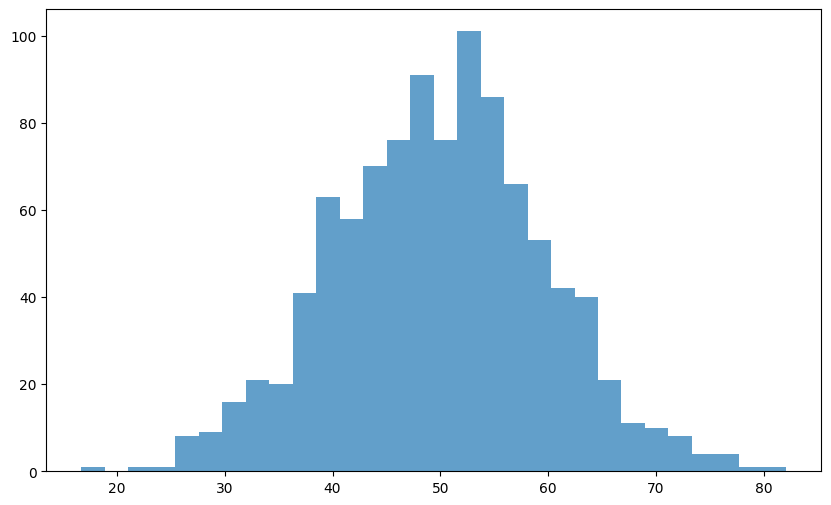

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Generate synthetic data (normal distribution)
data = np.random.normal(loc=50, scale=10, size=1000)

# Ensure no values are below a small positive constant for transformations
shifted_data = data - data.min() + 1  # Shift data to make all values positive

# Apply transformations
transformations = {
    "Log": np.log(shifted_data + 1e-8),  # Add a small epsilon to avoid zero values
    "Min-Max Scaling": (data - data.min()) / (data.max() - data.min()),
    "Standard Scaling": (data - data.mean()) / data.std(),
    "Logit": np.log((data - data.min() + 1e-8) / (data.max() - data.min() + 1e-8) / (1 - (data - data.min() + 1e-8) / (data.max() - data.min() + 1e-8))),
    "Reciprocal": 1 / shifted_data,
    "Box-Cox": boxcox(shifted_data)[0]
}

# Plot each transformation and save
def plot_and_save_transformations(data, transformations):
    for name, transformed in transformations.items():
        plt.figure(figsize=(10, 6))
        plt.hist(data, bins=30, alpha=0.7, label="Original Data")
        plt.hist(transformed, bins=30, alpha=0.7, label=f"{name} Transformation")
        plt.title(f"{name} Transformation")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{name.lower().replace(' ', '_')}_transformation.png")  # Save plot as image
        plt.close()

plot_and_save_transformations(data, transformations)